# <font color="#8333ff">TP : Pratiquez la régression logistique sur le jeu de données des maladies cardio-vasculaires</font>

Dans ce TP, vous allez appliquer la régression logistique sur le cas d'étude portant sur les maladies cardio-vasculaires.

## Importez les données

On charge tout d'abord les librairies nécessaires pour réaliser ce TP :

In [25]:
import os
print(os.getcwd())
os.chdir("/home/florian/Downloads/")


/home/florian/Downloads


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


On importe ensuite les données :

In [27]:
maladie = pd.read_table("maladie.txt", delimiter=";") # lire le fichier maladie.txt
maladie.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Ces données contiennent les informations de 462 patients d'Afrique du Sud. On y trouve des informations telles que :
- la tension artérielle ;
- le fait de fumer ou pas ;
- l'adiposité ;
- l'obésité ;
- etc.

La variable CHD est la variable qui indique si la personne a une maladie cardio-vasculaire (1) ou pas (0).

## Visualisez le nuage de points

Pour étudier le fait d'être malade en fonction de l'âge, on peut visualiser le nuage de points :

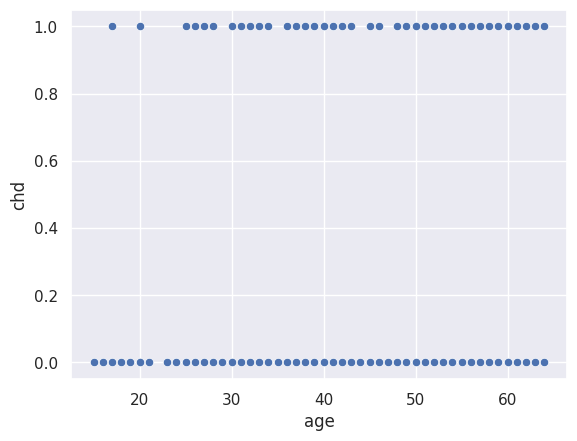

In [28]:
sns.set()

ax = sns.scatterplot(x="age", y="chd", data=maladie)

Il y a des 0 et des 1, mais il est ici difficile de dire si l'on est plus ou moins malade en fonction de l'âge.

On voit également qu'une régression linéaire sur un tel nuage de points n'aurait aucun sens, car elle nous donnerait des valeurs qui ne seraient quasiment jamais sur 0 ni 1.

## Calculez les proportions de malades

On peut calculer des classes d'âge et les proportions de malades associées.

In [29]:
#  Créez une nouvelle colonne cl_age qui regroupe les âges en tranches de 10 ans, allant de 15 à 75 ans, en excluant la borne supérieure de chaque tranche.
maladie['cl_age'] = pd.cut(maladie['age'], bins=np.arange(15, 76, 10))

In [30]:
maladie['cl_age']

0      (45, 55]
1      (55, 65]
2      (45, 55]
3      (55, 65]
4      (45, 55]
         ...   
457    (55, 65]
458    (45, 55]
459    (45, 55]
460    (35, 45]
461    (45, 55]
Name: cl_age, Length: 462, dtype: category
Categories (6, interval[int64, right]): [(15, 25] < (25, 35] < (35, 45] < (45, 55] < (55, 65] < (65, 75]]

In [31]:
#  Créez une nouvelle colonne cl_age qui regroupe les âges en tranches de 10 ans, allant de 15 à 75 ans, en excluant la borne supérieure de chaque tranche.
maladie['cl_age'] = pd.cut(maladie['age'], bins=np.arange(15, 76, 10))

# Calculez les proportions de personnes ayant une maladie cardiaque (chd) dans chaque groupe d'âge (cl_age). Utilisez la fonction pd.crosstab pour créer un tableau de fréquences normalisées par ligne.
prop = pd.crosstab(maladie['cl_age'], maladie['chd'], normalize='index')

#Créez un nouveau DataFrame prop_chd contenant une colonne 'age' et une colonne 'prop_chd'. La colonne 'age' doit répéter les bornes de chaque intervalle d'âge (par exemple, 15, 25, 25, 35, etc.). La colonne 'prop_chd' doit répéter les proportions de personnes ayant une maladie cardiaque pour chaque groupe d'âge.
prop_chd = pd.DataFrame(data = {'age': np.concatenate((np.array([15]), 
                                                       np.repeat(np.arange(25,65,10), repeats=2), 
                                                       np.array([65])), axis=0),
                                'prop_chd': np.repeat(prop.loc[:,1].values, repeats=2)})

prop_chd


,age,prop_chd
0,15,0.044118
1,25,0.044118
2,25,0.205479
3,35,0.205479
4,35,0.329897
5,45,0.329897
6,45,0.457944
7,55,0.457944
8,55,0.535088
9,65,0.535088


On peut représenter ces proportions :

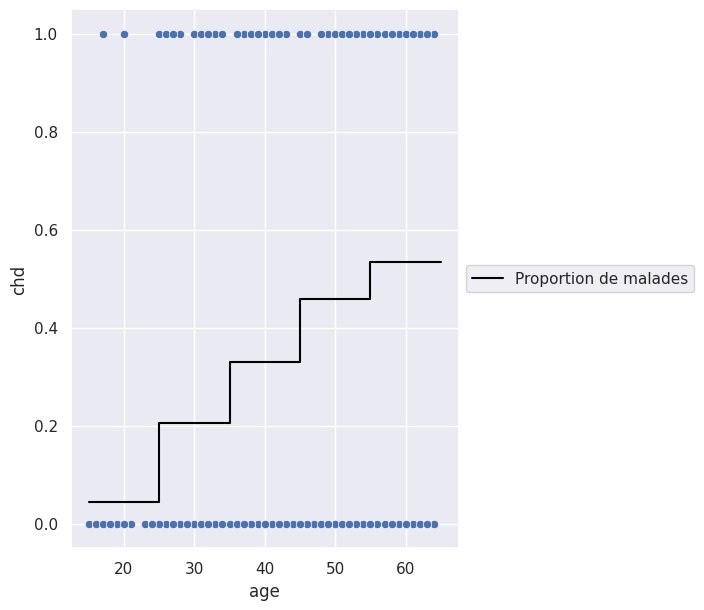

In [32]:
plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="age", y="chd", data=maladie)
plt.plot(prop_chd['age'], prop_chd['prop_chd'], color='black', label='Proportion de malades')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [33]:

# 1. Sélection des variables explicatives et cible
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X = maladie[['age']] # Variable explicative (l'âge)
y =  maladie['chd']  # Variable cible (la maladie cardiaque)

# 2. Instanciation du modèle de régression logistique
reg_log1 = LogisticRegression(penalty=None)

# 3. Entraînement du modèle sur les données
reg_log1.fit(X, y)

# 4. Extraction des coefficients et de l'intercept
print("Coefficients:", reg_log1.coef_)
print("Intercept:", reg_log1.intercept_)

# 5. Prédiction des probabilités de X
y_pred_proba = reg_log1.predict_proba(X)[:, 1]

# 6. Prédiction des classes
y_pred_classes = reg_log1.predict(X)

# 7. Calcul et affichage de l'exactitude
accuracy = accuracy_score(y, y_pred_classes)
print("Accuracy:", accuracy)

# 8. Rapport de classification complet
print(classification_report(y, y_pred_classes))

Coefficients: [[0.06410803]]
Intercept: [-3.52171021]
Accuracy: 0.6796536796536796
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       302
           1       0.55      0.44      0.49       160

    accuracy                           0.68       462
   macro avg       0.64      0.62      0.63       462
weighted avg       0.67      0.68      0.67       462



On obtient les paramètres estimés : $\hat{\beta}_{1}=−3.5$ et $\hat{\beta}_{2}=0.064$. Enregistrons-les :

In [34]:
beta1 = -3.5
beta2 = 0.064
beta1, beta2

(-3.5, 0.064)

Dans le but de tracer la courbe logistique entre les abscisses $x=15$ et $x=65$, on définit une séquence de 15 à 65 par pas de 500, puis on la place dans la variable x. On calcule ensuite les ordonnées de la courbe, grâce à l'expression de la courbe en S :
<br><br>
$f(x) = \frac{1}{1+e^{-\beta_{1}-\beta_{2}x}}$ 


Nous plaçons ces ordonnées dans la variable y. Enfin, avec x et y, nous créons un dataframe :

In [35]:
x = np.linspace(start=15, stop=65, num=500)
y = 1/(1+np.exp(-beta1-beta2*x))
reg_log = pd.DataFrame(data={'age': x, 'prop_chd': y})

Si l'on souhaite superposer la fonction de lien obtenue par régression logistique sur le graphique précédent, nous obtenons ceci :

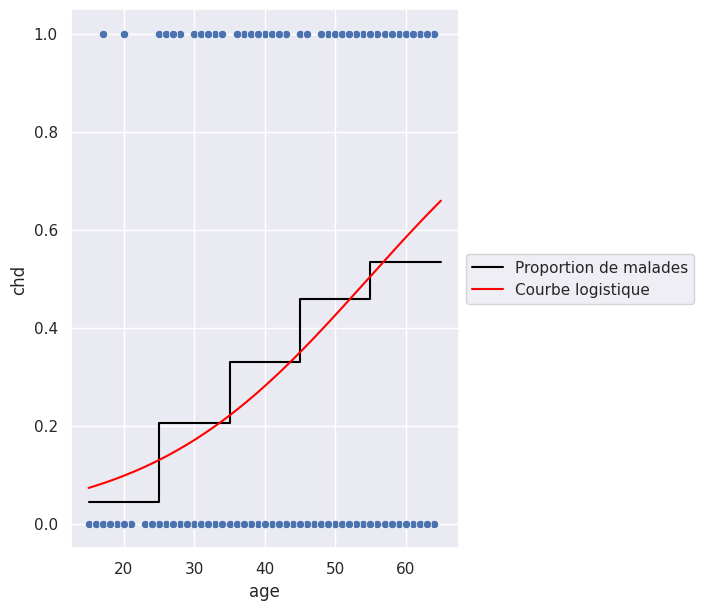

In [36]:
plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="age", y="chd", data=maladie)
plt.plot(prop_chd['age'], prop_chd['prop_chd'], color='black', label='Proportion de malades')
plt.plot(reg_log['age'], reg_log['prop_chd'], color='red', label='Courbe logistique')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

La courbe rouge est celle qui est obtenue par régression logistique.

Si l'on avait voulu considérer l'ensemble des variables médicales (et non pas seulement l'âge comme jusqu'à présent), nous aurions écrit :

In [37]:

# 1. Sélection des variables explicatives et cible (ensemble des variables médicales)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X2 = maladie[['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']]
#Transformer la variable famhist en dummies 
X2 = pd.get_dummies(X2, columns=['famhist'], drop_first=True) 

y = maladie['chd'].values    # Variable cible (la maladie cardiaque)

# 2. Instanciation du modèle de régression logistique
reg_log2 = LogisticRegression(penalty=None, solver='saga', max_iter=1000)

# 3. Entraînement du modèle sur les données

reg_log2.fit(X2, y)

# 4. Extraction des coefficients et de l'intercept
print("Coefficients:", reg_log2.coef_)
print("Intercept:", reg_log2.intercept_)

# 5. Prédiction des probabilités
y_pred_proba = reg_log2.predict_proba(X2)

# 6. Prédiction des classes
y_pred_classes = reg_log2.predict(X2)

# 7. Calcul et affichage de l'exactitude
accuracy = accuracy_score(y, y_pred_classes)
print("Accuracy:", accuracy)

# 8. Rapport de classification complet
print(classification_report(y, y_pred_classes))

Coefficients: [[-0.00707628  0.08273137  0.1688152   0.06285652  0.01138776 -0.17001849
   0.00049861  0.03041751  0.45215815]]
Intercept: [-0.1370908]
Accuracy: 0.7316017316017316
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       302
           1       0.65      0.48      0.55       160

    accuracy                           0.73       462
   macro avg       0.71      0.67      0.68       462
weighted avg       0.72      0.73      0.72       462



/home/florian/anaconda3/envs/jpn_ubuntu/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Et voilà, vous avez appliqué une régression logistique permettant de traiter des variables qualitatives binaires (avec deux modalités). Sachez qu'il existe d'autres méthodes de classification permettant de traiter des variables quantitatives avec davantage de modalités !

Vous disposez maintenant d’un modèle entraîné sur l’ensemble des données. Cependant, il est essentiel de garder une partie des données intacte pour l’évaluation. Divisez le dataset en deux ensembles : 80% pour l’entraînement et 20% pour le test.

Effectuez cette séparation et entraînez à nouveau le modèle sur les 80% des données d’entraînement. Testez-le ensuite sur les 20% des données de test. Comparez les performances du modèle sur les données de test avec les performances initiales. Qu'observez-vous ?

In [38]:
### Vous disposez maintenant d’un modèle entraîné sur l’ensemble des données. Cependant, il est essentiel de garder une partie des données intacte pour l’évaluation. Divisez le dataset en deux ensembles : 80% pour l’entraînement et 20% pour le test.
### Effectuez cette séparation et entraînez à nouveau le modèle sur les 80% des données d’entraînement. Testez-le ensuite sur les 20% des données de test. Comparez les performances du modèle sur les données de test avec les performances initiales. Qu'observez-vous ?

X3 = X
y = maladie['chd']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 6. Prédiction des classes
y_pred_classes = model.predict(X3)

# 8. Rapport de classification complet
print(classification_report(y, y_pred_classes))


Accuracy: 0.6344086021505376
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       302
           1       0.54      0.38      0.45       160

    accuracy                           0.67       462
   macro avg       0.63      0.60      0.61       462
weighted avg       0.65      0.67      0.66       462



### Entraînement avec un Arbre de Décision : 

Répétez les mêmes étapes, mais cette fois, en utilisant un *arbre de décision* du module *sklearn* pour l'entraînement. 

Entraînez l'arbre de décision sur 80% des données et évaluez-le sur les 20% restants. Comparez les performances obtenues avec celles du modèle initial. Que constatez-vous ?

In [39]:
###Répétez les mêmes étapes, mais cette fois, en utilisant un *arbre de décision* du module *sklearn* pour l'entraînement. 
###Entraînez l'arbre de décision sur 80% des données et évaluez-le sur les 20% restants. Comparez les performances obtenues avec celles du modèle initial. Que constatez-vous ?
from sklearn.tree import DecisionTreeClassifier
X4 = X2
y = maladie['chd']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train4, y_train4)

y_pred = model.predict(X_test4)

accuracy = accuracy_score(y_test4, y_pred)
print("Accuracy:", accuracy)

# 6. Prédiction des classes
y_pred_classes = model.predict(X4)
# 8. Rapport de classification complet
print(classification_report(y, y_pred_classes))

Accuracy: 0.5913978494623656
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       302
           1       0.88      0.88      0.88       160

    accuracy                           0.92       462
   macro avg       0.91      0.91      0.91       462
weighted avg       0.92      0.92      0.92       462



### Entraînement avec un Arbre de Décision : 

Répétez les mêmes étapes, mais cette fois, en utilisant une *foret de décision* du module *sklearn* pour l'entraînement. 

Entraînez la foret de décision sur 80% des données et évaluez-le sur les 20% restants. Comparez les performances obtenues avec celles du modèle initial. Que constatez-vous ?

In [40]:
#Test avec une random forest

from sklearn.ensemble import RandomForestClassifier
X5 = X2
y = maladie['chd']

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train5, y_train5)

y_pred = model.predict(X_test5)

accuracy = accuracy_score(y_test5, y_pred)
print("Accuracy:", accuracy)

# 6. Prédiction des classes
y_pred_classes = model.predict(X5)
# 8. Rapport de classification complet
print(classification_report(y, y_pred_classes))

Accuracy: 0.7419354838709677
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       302
           1       0.95      0.90      0.92       160

    accuracy                           0.95       462
   macro avg       0.95      0.94      0.94       462
weighted avg       0.95      0.95      0.95       462



In [41]:
from sklearn.feature_selection import SelectFromModel
X6 = X2
y = maladie['chd']

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y, test_size=0.2, random_state=42)

model_initial = RandomForestClassifier()
model_initial.fit(X_train6, y_train6)
print(X_train6.columns,model_initial.feature_importances_)

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol',
       'age', 'famhist_Present'],
      dtype='object') [0.11319677 0.12717745 0.12769031 0.11505582 0.11271098 0.10975764
 0.08412503 0.17413291 0.03615308]


In [42]:
X6

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,True
1,144,0.01,4.41,28.61,55,28.87,2.06,63,False
2,118,0.08,3.48,32.28,52,29.14,3.81,46,True
3,170,7.50,6.41,38.03,51,31.99,24.26,58,True
4,134,13.60,3.50,27.78,60,25.99,57.34,49,True
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,False
458,182,4.20,4.41,32.10,52,28.61,18.72,52,False
459,108,3.00,1.59,15.23,40,20.09,26.64,55,False
460,118,5.40,11.61,30.79,64,27.35,23.97,40,False


In [49]:


selector = SelectFromModel(model_initial, prefit=True)
important_features = selector.transform(X_train6)

model_final = RandomForestClassifier()
model_final.fit(important_features, y_train6)

y_pred = model.predict(X_test6)

accuracy = accuracy_score(y_test6, y_pred)
print("Accuracy:", accuracy)

# 6. Prédiction des classes
X_test6_transformed = selector.transform(X_test6)
y_pred_classes = model_final.predict(X_test6_transformed)
# 8. Rapport de classification complet
print(classification_report(y, y_pred_classes))

Accuracy: 0.7419354838709677


/home/florian/anaconda3/envs/jpn_ubuntu/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/home/florian/anaconda3/envs/jpn_ubuntu/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [462, 93]

In [44]:
important_features.shape

(369, 6)

In [ ]:
important_features

array([[1.660e+02, 8.000e-01, 5.630e+00, ..., 5.000e+01, 3.472e+01,
        6.000e+01],
       [1.180e+02, 1.200e-01, 1.960e+00, ..., 3.700e+01, 2.001e+01,
        1.800e+01],
       [1.260e+02, 5.100e+00, 2.960e+00, ..., 5.500e+01, 2.552e+01,
        3.800e+01],
       ...,
       [1.300e+02, 8.000e-02, 5.590e+00, ..., 5.000e+01, 2.498e+01,
        4.300e+01],
       [1.360e+02, 0.000e+00, 1.770e+00, ..., 4.500e+01, 2.151e+01,
        1.600e+01],
       [1.180e+02, 0.000e+00, 4.340e+00, ..., 5.200e+01, 3.218e+01,
        4.600e+01]])